In [2]:
pwd

'/Users/gerardfullsack/Desktop/SF-Restaurant-Yelp-and-Health-Score'

In [3]:
import pandas as pd
from sqlalchemy import create_engine
import json
from pymongo import MongoClient



In [4]:
client = MongoClient('localhost', 27017)
db = client['SF_Restaurant_db']

In [5]:
csv_file = "Resources/SF_restaurant_scores_lives_standard.csv"
Restaurant_health_data_df = pd.read_csv(csv_file)
Restaurant_health_data_df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods,Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
1,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,...,Non-inspection site visit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
4,96024,Fig & Thistle Market,691 14th St,San Francisco,CA,94114,NaN,NaN,NaN,NaN,...,New Ownership - Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
csv_file = "Resources/SF_restaurant_scores_lives_standard.csv"
Restaurant_health_data_df = pd.read_csv(csv_file)
Restaurant_health_data_df = Restaurant_health_data_df[Restaurant_health_data_df["inspection_score"].notnull()]
Restaurant_health_data_df = Restaurant_health_data_df[Restaurant_health_data_df["inspection_date"].str.match("2019")]
Restaurant_health_data_df = Restaurant_health_data_df.drop_duplicates(subset = "business_id")
Restaurant_health_data_df

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods,Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
62,78215,Mission Chinese Food SF,2234 Mission St,San Francisco,CA,94110,NaN,NaN,NaN,1.415586e+10,...,Routine - Unscheduled,78215_20190304_103131,Moderate risk vermin infestation,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
72,91984,Cha Cha Cha,1801 Haight St,San Francisco,CA,94117,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,91984_20190627_103103,High risk food holding temperature,High Risk,NaN,NaN,NaN,NaN,NaN,NaN
78,94394,Kokio Republic,428 11th St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,94394_20190111_103105,Improper cooling methods,High Risk,NaN,NaN,NaN,NaN,NaN,NaN
82,97065,CHALOS,2240 Taraval St,San Francisco,CA,94116,NaN,NaN,NaN,1.415530e+10,...,Routine - Unscheduled,97065_20190712_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN
85,71287,Glaze Teriyaki,1946 FILLMORE St,San Francisco,CA,94115,37.787778,-122.433557,"{'longitude': '-122.433557', 'human_address': ...",1.415578e+10,...,Routine - Unscheduled,71287_20190716_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,27.0,9.0,11.0,13.0,29490.0,30.0
90,76061,Bobo's Lounge,1434 Lombard St,San Francisco,CA,94123,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,76061_20190711_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
106,76665,Eurest Dining - Verizon,201 Spear St,San Francisco,CA,94104,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,82225,Harry Harringtons Pub,460 Larkin St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,82225_20190319_103150,Improper or defective plumbing,Low Risk,NaN,NaN,NaN,NaN,NaN,NaN
124,98047,BAZAAR CAFE,5927 California St,San Francisco,CA,94121,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
health_data_df = Restaurant_health_data_df[['business_id', 'business_name','business_city','inspection_score', 'inspection_date']].copy()
health_data_df.head()





,business_id,business_name,business_city,inspection_score,inspection_date
0,97975,BREADBELLY,San Francisco,96.0,2019-07-25T00:00:00.000
62,78215,Mission Chinese Food SF,San Francisco,83.0,2019-03-04T00:00:00.000
72,91984,Cha Cha Cha,San Francisco,61.0,2019-06-27T00:00:00.000
78,94394,Kokio Republic,San Francisco,84.0,2019-01-11T00:00:00.000
82,97065,CHALOS,San Francisco,93.0,2019-07-12T00:00:00.000


In [8]:
#json_file = "Resources/business.json"
#Yelp_business_df = pd.read_json (json_file, lines = True )


In [9]:
#new_yelp_business_df = Yelp_business_df[["name","categories", "city","stars","state","postal_code" ]].copy()


In [10]:
#CA_yelp_business_df = new_yelp_business_df.loc[new_yelp_business_df["state"]=="CA"]
#CA_yelp_business_df.head()



#SF_restaurant_yelp_business_df = CA_yelp_business_df.loc[Restaurant_yelp_business_df["city"]=="San Francisco"]
#SF_restaurant_yelp_business_df.head()
#CA_yelp_business_df

In [11]:
csv_file = "Resources/yelp_restaurants.csv"
Raw_restaurant_data_df = pd.read_csv(csv_file)
Raw_restaurant_data_df.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,fog-harbor-fish-house-san-francisco-2,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 37.809041, 'longitude': -122.410233}",(415) 421-2442,5827.740044,f-m7-hyFzkf0HSEeQ2s-9A,https://s3-media1.fl.yelpcdn.com/bphoto/Lv7tIR...,False,"{'address1': 'Pier 39', 'address2': 'Ste A-202...",Fog Harbor Fish House,1.415421e+10,$$,4.0,5531,['restaurant_reservation'],https://www.yelp.com/biz/fog-harbor-fish-house...
1,the-house-san-francisco,"[{'alias': 'asianfusion', 'title': 'Asian Fusi...","{'latitude': 37.79851, 'longitude': -122.40706}",(415) 986-8612,4911.928932,ZoZjbOYR-apY8XvommlNUA,https://s3-media2.fl.yelpcdn.com/bphoto/UzrNIk...,False,"{'address1': '1230 Grant Ave', 'address2': '',...",The House,1.415987e+10,$$$,4.5,4650,['restaurant_reservation'],https://www.yelp.com/biz/the-house-san-francis...
2,marufuku-ramen-sf-san-francisco,"[{'alias': 'ramen', 'title': 'Ramen'}]","{'latitude': 37.785155, 'longitude': -122.432075}",(415) 872-9786,2724.336437,HHtpR0RslupSQ99GIIwW5A,https://s3-media2.fl.yelpcdn.com/bphoto/2lUFO5...,False,"{'address1': '1581 Webster St', 'address2': 'S...",Marufuku Ramen SF,1.415873e+10,$$,4.5,2404,[],https://www.yelp.com/biz/marufuku-ramen-sf-san...
3,beretta-san-francisco,"[{'alias': 'italian', 'title': 'Italian'}, {'a...","{'latitude': 37.75384, 'longitude': -122.42055}",(415) 695-1199,1591.309745,4KfQnlcSu4bbTqnvGdGptw,https://s3-media1.fl.yelpcdn.com/bphoto/RsCeyB...,False,"{'address1': '1199 Valencia St', 'address2': '...",Beretta,1.415695e+10,$$,4.0,3500,['restaurant_reservation'],https://www.yelp.com/biz/beretta-san-francisco...
4,farmhouse-kitchen-thai-cuisine-san-francisco,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...","{'latitude': 37.7602179, 'longitude': -122.411...",(415) 814-2920,2228.504131,8kck3-K4zYKTJbJko0JlXQ,https://s3-media3.fl.yelpcdn.com/bphoto/AC0JE-...,False,"{'address1': '710 Florida St', 'address2': '',...",Farmhouse Kitchen Thai Cuisine,1.415814e+10,$$,4.0,2034,"['pickup', 'delivery', 'restaurant_reservation']",https://www.yelp.com/biz/farmhouse-kitchen-tha...


In [12]:
Yelp_SF_Restaurant_data_df = Raw_restaurant_data_df[['alias', 'name', 'categories','coordinates', 'price' ,'rating', 'review_count']].copy()
Yelp_SF_Restaurant_data_df.head()






,alias,name,categories,coordinates,price,rating,review_count
0,fog-harbor-fish-house-san-francisco-2,Fog Harbor Fish House,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 37.809041, 'longitude': -122.410233}",$$,4.0,5531
1,the-house-san-francisco,The House,"[{'alias': 'asianfusion', 'title': 'Asian Fusi...","{'latitude': 37.79851, 'longitude': -122.40706}",$$$,4.5,4650
2,marufuku-ramen-sf-san-francisco,Marufuku Ramen SF,"[{'alias': 'ramen', 'title': 'Ramen'}]","{'latitude': 37.785155, 'longitude': -122.432075}",$$,4.5,2404
3,beretta-san-francisco,Beretta,"[{'alias': 'italian', 'title': 'Italian'}, {'a...","{'latitude': 37.75384, 'longitude': -122.42055}",$$,4.0,3500
4,farmhouse-kitchen-thai-cuisine-san-francisco,Farmhouse Kitchen Thai Cuisine,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...","{'latitude': 37.7602179, 'longitude': -122.411...",$$,4.0,2034


In [13]:
Yelp_SF_Restaurant_data_df.sort_values(ascending = True, by = 'name')

,alias,name,categories,coordinates,price,rating,review_count
728,15-romolo-san-francisco,15 Romolo,"[{'alias': 'tapasmallplates', 'title': 'Tapas/...","{'latitude': 37.7981914, 'longitude': -122.406...",$$,4.0,1050
613,1601-bar-and-kitchen-san-francisco,1601 Bar & Kitchen,"[{'alias': 'asianfusion', 'title': 'Asian Fusi...","{'latitude': 37.7715817, 'longitude': -122.416...",$$$,4.0,260
482,1608-bistro-san-francisco,1608 Bistro,"[{'alias': 'breakfast_brunch', 'title': 'Break...","{'latitude': 37.7883672, 'longitude': -122.423...",$$,4.0,194
631,1760-san-francisco,1760,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 37.79312, 'longitude': -122.4209}",$$$,4.0,683
770,20-spot-san-francisco,20 Spot,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 37.75834, 'longitude': -122.42036}",$$,4.5,238
665,21-taste-house-san-francisco,21 Taste House,"[{'alias': 'ramen', 'title': 'Ramen'}]","{'latitude': 37.7234497070312, 'longitude': -1...",$$,4.0,255
506,3rd-cousin-san-francisco-2,3rd Cousin,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 37.73907, 'longitude': -122.41366}",$$$,4.0,244
931,4505-burgers-and-bbq-san-francisco,4505 Burgers & BBQ,"[{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...","{'latitude': 37.7761896, 'longitude': -122.438...",$$,3.5,1496
366,54-mint-ristorante-italiano-san-francisco-2,54 Mint - Ristorante Italiano,"[{'alias': 'italian', 'title': 'Italian'}, {'a...","{'latitude': 37.7826100091309, 'longitude': -1...",$$$,4.0,1121
157,5a5-steak-lounge-san-francisco-4,5A5 Steak Lounge,"[{'alias': 'steak', 'title': 'Steakhouses'}, {...","{'latitude': 37.7969972, 'longitude': -122.400...",$$$,4.0,2137


In [14]:
Yelp_SF_Restaurant_data_df.shape

(1000, 7)

In [15]:
Yelp_SF_Restaurant_data_df.drop_duplicates(subset= 'name', keep='first', inplace= True)

In [16]:
Yelp_SF_Restaurant_data_df[Yelp_SF_Restaurant_data_df.name == "Cha Cha Cha"]

,alias,name,categories,coordinates,price,rating,review_count
63,cha-cha-cha-san-francisco-4,Cha Cha Cha,"[{'alias': 'caribbean', 'title': 'Caribbean'},...","{'latitude': 37.7691434, 'longitude': -122.452...",$$,4.0,3185


In [17]:
Yelp_SF_Restaurant_data_df.shape

(969, 7)

In [18]:
Health_data = health_data_df
Health_data.columns

Health_data[['business_id', 'business_name', 'business_city', 'inspection_score', 'inspection_date']]

Yelp_data = Yelp_SF_Restaurant_data_df

Yelp_data.columns

Yelp_data[['alias', 'name', 'categories', 'coordinates', 'price', 'rating', 'review_count']]

,alias,name,categories,coordinates,price,rating,review_count
0,fog-harbor-fish-house-san-francisco-2,Fog Harbor Fish House,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 37.809041, 'longitude': -122.410233}",$$,4.0,5531
1,the-house-san-francisco,The House,"[{'alias': 'asianfusion', 'title': 'Asian Fusi...","{'latitude': 37.79851, 'longitude': -122.40706}",$$$,4.5,4650
2,marufuku-ramen-sf-san-francisco,Marufuku Ramen SF,"[{'alias': 'ramen', 'title': 'Ramen'}]","{'latitude': 37.785155, 'longitude': -122.432075}",$$,4.5,2404
3,beretta-san-francisco,Beretta,"[{'alias': 'italian', 'title': 'Italian'}, {'a...","{'latitude': 37.75384, 'longitude': -122.42055}",$$,4.0,3500
4,farmhouse-kitchen-thai-cuisine-san-francisco,Farmhouse Kitchen Thai Cuisine,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...","{'latitude': 37.7602179, 'longitude': -122.411...",$$,4.0,2034
5,liholiho-yacht-club-san-francisco-2,Liholiho Yacht Club,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...","{'latitude': 37.78818, 'longitude': -122.41458}",$$$,4.5,2203
6,loló-san-francisco-4,Loló,"[{'alias': 'tapasmallplates', 'title': 'Tapas/...","{'latitude': 37.7573462, 'longitude': -122.421...",$$,4.0,2072
7,delarosa-san-francisco,Delarosa,"[{'alias': 'italian', 'title': 'Italian'}, {'a...","{'latitude': 37.800287, 'longitude': -122.4391...",$$,4.0,1454
8,the-front-porch-san-francisco,The Front Porch,"[{'alias': 'southern', 'title': 'Southern'}, {...","{'latitude': 37.7438, 'longitude': -122.422035}",$$,4.0,2719
9,scomas-restaurant-san-francisco-3,Scoma's Restaurant,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 37.808944, 'longitude': -122.418462}",$$$,4.0,3567


In [19]:
merged_inner_df = pd.merge(left=Health_data,right=Yelp_data, left_on='business_name', right_on='name')

In [20]:
merged_inner_df

,business_id,business_name,business_city,inspection_score,inspection_date,alias,name,categories,coordinates,price,rating,review_count
0,91984,Cha Cha Cha,San Francisco,61.0,2019-06-27T00:00:00.000,cha-cha-cha-san-francisco-4,Cha Cha Cha,"[{'alias': 'caribbean', 'title': 'Caribbean'},...","{'latitude': 37.7691434, 'longitude': -122.452...",$$,4.0,3185
1,71287,Glaze Teriyaki,San Francisco,86.0,2019-07-16T00:00:00.000,glaze-teriyaki-san-francisco-3,Glaze Teriyaki,"[{'alias': 'japanese', 'title': 'Japanese'}, {...","{'latitude': 37.7879022, 'longitude': -122.433...",$$,4.0,450
2,78722,Arang Restaurant,San Francisco,66.0,2019-01-22T00:00:00.000,arang-restaurant-san-francisco,Arang Restaurant,"[{'alias': 'korean', 'title': 'Korean'}]","{'latitude': 37.7834828, 'longitude': -122.432...",$$,3.5,605
3,88799,Village House,San Francisco,79.0,2019-07-02T00:00:00.000,village-house-san-francisco-24,Village House,"[{'alias': 'szechuan', 'title': 'Szechuan'}, {...","{'latitude': 37.77603, 'longitude': -122.49492}",$$,4.5,225
4,91300,Zzan,San Francisco,65.0,2019-02-11T00:00:00.000,zzan-san-francisco-2,Zzan,"[{'alias': 'korean', 'title': 'Korean'}]","{'latitude': 37.7875, 'longitude': -122.41233}",$$,3.5,214
5,89130,Tasty Pot,San Francisco,85.0,2019-01-23T00:00:00.000,tasty-pot-san-francisco,Tasty Pot,"[{'alias': 'taiwanese', 'title': 'Taiwanese'},...","{'latitude': 37.7827072888613, 'longitude': -1...",$$,4.0,420
6,77960,Good Luck Dim Sum,San Francisco,75.0,2019-01-23T00:00:00.000,good-luck-dim-sum-san-francisco,Good Luck Dim Sum,"[{'alias': 'dimsum', 'title': 'Dim Sum'}]","{'latitude': 37.7830772399902, 'longitude': -1...",$,4.0,1545
7,93336,Thai Idea Vegetarian,San Francisco,88.0,2019-03-12T00:00:00.000,thai-idea-vegetarian-san-francisco-2,Thai Idea Vegetarian,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...","{'latitude': 37.7834938, 'longitude': -122.419...",$$,4.5,710
8,90504,Tara Indian Cuisine,San Francisco,89.0,2019-05-30T00:00:00.000,tara-indian-cuisine-san-francisco,Tara Indian Cuisine,"[{'alias': 'indpak', 'title': 'Indian'}]","{'latitude': 37.7654084, 'longitude': -122.431...",$$,4.0,328
9,95752,Ichiraku Ramen,San Francisco,90.0,2019-02-26T00:00:00.000,ichiraku-ramen-san-francisco-2,Ichiraku Ramen,"[{'alias': 'ramen', 'title': 'Ramen'}, {'alias...","{'latitude': 37.78076, 'longitude': -122.47679}",$$,4.0,173


In [23]:
for col in merged_inner_df.columns: 
    print(col) 



business_id
business_name
business_city
inspection_score
inspection_date
alias
name
categories
coordinates
price
rating
review_count


In [24]:
rds_connection_string =rds_connection_string = "postgres:Estarrol88@localhost:5432/yelp_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [25]:
engine.table_names()

['merged_data']

In [26]:
merged_inner_df.to_sql(name='merged_data', con=engine, if_exists='append', index=False)

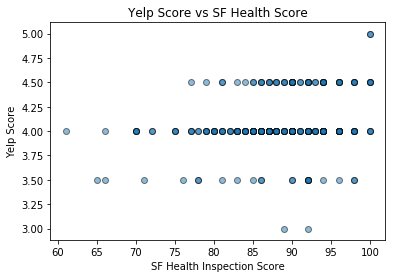

In [64]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(0)
x = merged_inner_df["inspection_score"]
y = merged_inner_df["rating"]

plt.scatter(x, y, edgecolors="black", alpha=0.5,
            cmap='viridis')

plt.title("Yelp Score vs SF Health Score")
plt.xlabel("SF Health Inspection Score")
plt.ylabel("Yelp Score")

plt.savefig("Images/Scatterplot.png")





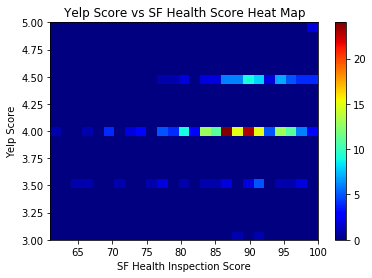

In [65]:
plt.hist2d(x, y, (25,25), cmap=plt.cm.jet)
plt.colorbar()

plt.title("Yelp Score vs SF Health Score Heat Map")
plt.xlabel("SF Health Inspection Score")
plt.ylabel("Yelp Score")

plt.savefig("Images/heatscatterplot.png")



In [66]:
# Correlation 
x.corr(y)

0.24058599175401413